In [10]:
import torch
import torch.nn
import torch.nn.utils.prune
import torchvision
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from d2l import torch as d2l
from dl_assignment_7_common import *

In [11]:
lenet_final, epoch_stats = load_network("7.5_lottery_lenet", 1.2e-3, "adam")

In [12]:
prune_percentages = np.array([99.5, 99, 95, 90, 75, 50, 10]) / 100

## Create pruned networks

In [ ]:
print(2a/0) #Remove this to run the cell
for p in prune_percentages:
    for state in ["pretrained", "trained"]:
        if state=="pretrained":
            net = copy.deepcopy(lenet_final)
        else:
            net = create_network("lenet")
        prune_network(net, "lenet", p)
        torch.save(...)

## Train the untrained pruned networks

#DONT RUN AGAIN!
print(20/0)
dataset_name = "MNIST"
net_name = "lenet"
epochs, lr = get_num_epochs(net_name), 1.2e-3

train_data, valid_data, test_data = get_dataloaders(dataset_name, model_name=net_name, batch_size=60)
datasets = {"valid": valid_data, "test": test_data, "train": train_data}

for p in prune_percentages:
    for state in ["untrained", "trained"]:
        network = torch.load(os.path.join("lenet_prunes_untrained", "lenet_pruned_"+state+"_"+str(p)+".pth"))
        print("Training:", state, p)
        trained, history = train(network, datasets, f"{p}_{state}_lenet", epochs=epochs, lr=lr, plot=False, optimizer="adam", 
                         early_stop_metric="valid_loss", save_patience=1)

### Make the graphs

In [18]:
folder = os.path.join("checkpoints", "lenet_prunes_trained")
pretrained = {"best_epoch": [], "test_acc": []}
untrained = {"best_epoch": [], "test_acc": []}
for p in prune_percentages:
    for state in ["untrained", "pretrained"]:
        net, history = load_network(f"{p}_{state}_lenet", 1.2e-3, "adam", folder)
        best_epoch = history["early_stop_epoch"][-1]
        if state=="pretrained":
            pretrained["best_epoch"].append(best_epoch)
            pretrained["test_acc"].append(history["test_acc"][best_epoch-1])
        else:
            untrained["best_epoch"].append(best_epoch)
            untrained["test_acc"].append(history["test_acc"][best_epoch-1])

In [48]:
pretrained

{'best_epoch': [52, 55, 5, 4, 2, 2, 2],
 'test_acc': [0.9381, 0.9613, 0.9762, 0.9819, 0.9823, 0.9835, 0.9791]}

In [49]:
untrained

{'best_epoch': [55, 55, 18, 10, 6, 5, 3],
 'test_acc': [0.7847, 0.9004, 0.9673, 0.9707, 0.9738, 0.9752, 0.9774]}

In [50]:
prune_percentages

array([0.995, 0.99 , 0.95 , 0.9  , 0.75 , 0.5  , 0.1  ])

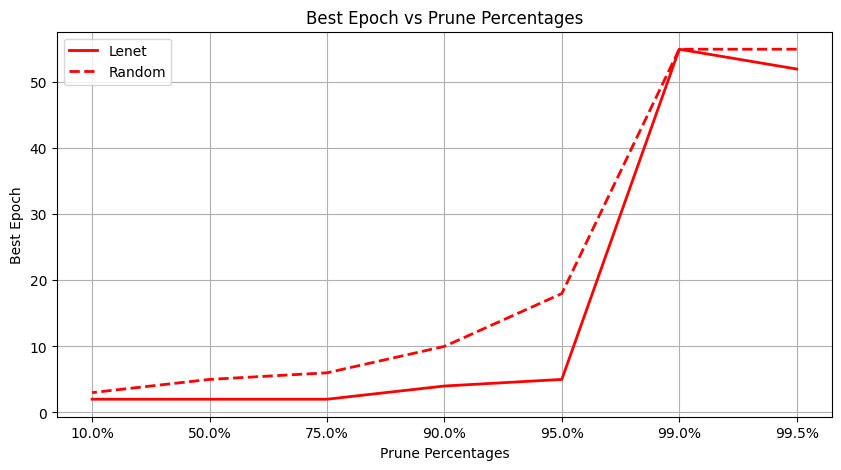

In [51]:
plt.figure(figsize=(10, 5))
x=[7,6,5,4,3,2,1]
plt.plot(x, pretrained['best_epoch'], 'r-', label='Lenet', linewidth=2)
plt.plot(x, untrained['best_epoch'], 'r--', label='Random', linewidth=2)
plt.xlabel('Prune Percentages')
plt.ylabel('Best Epoch')
plt.title('Best Epoch vs Prune Percentages')
plt.xticks(x, [str((p*100))+"%" for p in prune_percentages])
plt.legend()
plt.grid(True)

plt.show()

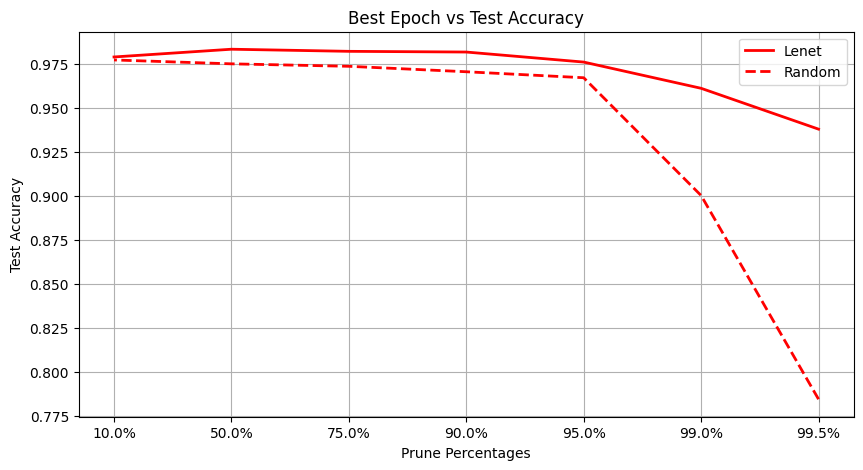

In [52]:
plt.figure(figsize=(10, 5))
x=[7,6,5,4,3,2,1]
plt.plot(x, pretrained['test_acc'], 'r-', label='Lenet', linewidth=2)
plt.plot(x, untrained['test_acc'], 'r--', label='Random', linewidth=2)
plt.xlabel('Prune Percentages')
plt.ylabel('Test Accuracy')
plt.title('Best Epoch vs Test Accuracy')
plt.xticks(x, [str((p*100))+"%" for p in prune_percentages])
plt.legend()
plt.grid(True)

plt.show()
